In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load dataset and keep the top 10,000 most frequent words
top_words = 10000
most_words = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words, skip_top=most_words)

# Set maximum review length
max_review_length = 500

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=max_review_length)
x_test = pad_sequences(x_test, maxlen=max_review_length)

print(f'Training data shape: {x_train.shape}, Labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Labels shape: {y_test.shape}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (25000, 500), Labels shape: (25000,)
Test data shape: (25000, 500), Labels shape: (25000,)


In [4]:
# Define the model
model = Sequential([
    Embedding(input_dim=top_words, output_dim=32, input_length=max_review_length),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with appropriate loss, optimizer, and metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model for 10 epochs and 128 batchsize
history = model.fit(
    x_train, y_train,
    validation_split=0.2,  # 20% validation split
    epochs=10,
    batch_size=128,
    verbose=2
)

Epoch 1/10
157/157 - 18s - 115ms/step - accuracy: 0.6637 - loss: 0.6087 - val_accuracy: 0.7042 - val_loss: 0.5646
Epoch 2/10
157/157 - 13s - 85ms/step - accuracy: 0.8310 - loss: 0.4016 - val_accuracy: 0.8314 - val_loss: 0.3953
Epoch 3/10
157/157 - 14s - 86ms/step - accuracy: 0.8887 - loss: 0.2797 - val_accuracy: 0.8376 - val_loss: 0.3805
Epoch 4/10
157/157 - 14s - 87ms/step - accuracy: 0.9239 - loss: 0.2014 - val_accuracy: 0.8166 - val_loss: 0.4173
Epoch 5/10
157/157 - 14s - 88ms/step - accuracy: 0.9445 - loss: 0.1548 - val_accuracy: 0.8360 - val_loss: 0.4230
Epoch 6/10
157/157 - 14s - 87ms/step - accuracy: 0.9661 - loss: 0.1016 - val_accuracy: 0.7292 - val_loss: 0.6427
Epoch 7/10
157/157 - 14s - 87ms/step - accuracy: 0.9767 - loss: 0.0736 - val_accuracy: 0.7804 - val_loss: 0.5933
Epoch 8/10
157/157 - 15s - 95ms/step - accuracy: 0.9873 - loss: 0.0460 - val_accuracy: 0.8096 - val_loss: 0.5635
Epoch 9/10
157/157 - 16s - 99ms/step - accuracy: 0.9954 - loss: 0.0228 - val_accuracy: 0.8044 -

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

782/782 - 13s - 16ms/step - accuracy: 0.7492 - loss: 0.8127
Test Accuracy: 74.92%


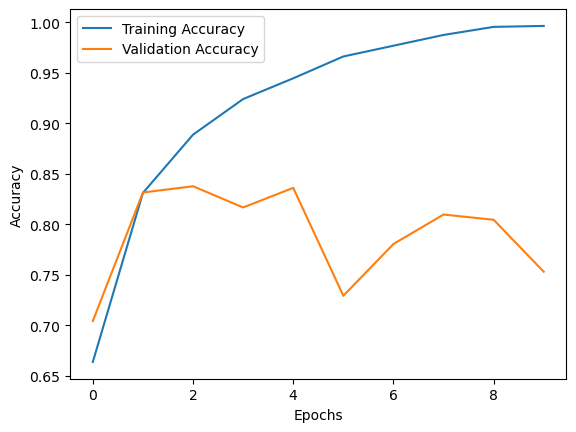

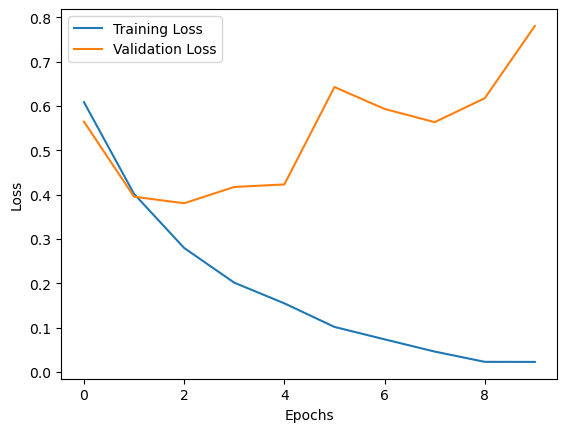

In [7]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
